# Machine learning methods 2016

<img src="ml_map.png" width="100%"/>

## Syllabus

<img src="ML2016Syllabus_Page_1.png" width="110%" />
<img src="ML2016Syllabus_Page_2.png" width="110%" />
<img src="ML2016Syllabus_Page_3.png" width="110%" />

## Ważne daty

* proponowana data "mid-termu": 27 kwietnia 2016, 10 wykład (w terminie wykładu)

<h1 id=tocheading>Spis treści</h1>
<div id="toc"></div>

In [6]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# What is machine learning about and what do you eat it with?

Peter Flach gives __spam filter__ as an example for machine learning with different values for some features of an e-mail, some of them:

`-0.1 RCVD_IN_MXRATE_WL   ` rbl: MXRate allowed  
` 0.6 HTML_IMAGE_RATIO    ` body: ratio of text to image  
` 1.2 TVD_FW_GRAPHIC_NAME ` body: tvd fw graphic name mid  
` 0.0 HTML_MESSAGE        ` body: HTML included in message  
` 0.6 HTML_FON_FACE_BAD   ` body: html font face is not a word  
` 1.4 AWL                 ` AWL: From: address is in the auto white-list  
all together give $5.3$ end value $\longrightarrow$ `spam` (actually it was an information about a mail classified as spam with end value of $14.3$).

An url `www.ecmlpkdd2008.org` raised the spam value (high number of non-vowels in address)!

A __linear classifier__ for spam detector can be built using $$\sum_{i=1}^{N}w_ix_i>t,$$where $t$ is a __threshold__.

__Machine learning is the systematic study of algorithms and systems that improve their knowledge or performance with experience__ (Flach). We always __learn from data__. Machine learning aims at developing __efficient__ algorithms for _designing models_, for _analysis_ and _prediction_.

* __generalization__: the system's ability to predict correctly new examples of a problem that were _not_ included in a training set used,
* __overfitting__: if the system provides correct predictions for examples from the training set, but cannot eneralize well to new data

## Classification
_Assign_ a pattern to one out of a number of classes that are considered to be known. There are several steps in model design
* __encode__ the pattern as a __feature vector__,
  * we usually start with large number of features reducing them in a _feature selection_ stage
* __train__ a classifier
  * __supervised__, __unsupervised__, __clustering__, __semisupervised__ _learning_

## Regression
* the _output_ variable is __not__ discrete but takes values in some real (or complex)
axis/area
* the task is to estimate a function

# Regresja liniowa

## Zadanie regresji liniowej
* __Regresja__: modelowanie związku między zmienną _zależną_ $y$ generowaną przez __system__ a zmiennymi _niezależnymi_ ($x_1, x_2, \dots$), które aktywują ten system. Związek jest zadany przez dodanie niezależnego czynnika _szumu_ $\eta$, który jest zmienną _ukrytą_. 
  
* Celem regresji (liniowej) jest estymacja wektora parametrów $\theta$ dla zbioru danych $\{(x_i, y_i)\}_{i=1}^{N}$ jako relacji 
$$y=\theta_0+\theta_1x_1+\dots+\theta_px_p=\theta_0+\theta^T{}x+\eta=[\theta_0,\theta]^T[1,x]+\eta=\theta^Tx+\eta,$$ 
gdzie $\theta_0$ to _bias_.
  
* W modelu _regresji liniowej_ mamy model $\hat{y}=\hat{\theta}^Tx$
  
* W metodzie _minimalnych kwadratów_ _least squares_ __LS__ funkcja kosztu $$J(\theta)=\sum_{i=1}^{N}(y_i-\theta^Tx_i)^2$$ Biorąc gradient ze względu na $\theta$
$$\nabla{}J(\theta)=\sum_{i=1}^{N}(y_i-\theta^Tx_i)^2=2\sum_{i=1}^{N}(y_i-\theta^Tx_i)x_i^T$$
i przyrównując do zera otrzymujemy $$\left(\sum_ix_ix^T_i\right)\hat{\theta}=\sum_ix_iy_i$$ co można zapisać jako $$X^TX\hat{\theta}=X^Ty,$$ gdzie $y=[y_1,y_2,\dots,y_N]^T$ co daje rozwiązanie __LS__ jako 
$$\boxed{
\hat{\theta}=(X^TX)^{-1}X^Ty\;}$$ pod warunkiem istnienia $(X^TX)^{-1}$.
  
* Jeśli $(p+1)\times(p+1)$ wymiarowa macierz $X^TX$ jest odwracalna, to rozwiązanie jest __unikalne__ ze względu na _wypukłość_ i paraboliczny kształt funkcji kosztu LS.

In [3]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [4]:
from sklearn.datasets import load_boston, load_diabetes, load_linnerud
from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3
from sklearn.datasets import make_sparse_uncorrelated
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error

In [5]:
from astroML.datasets import fetch_imaging_sample
from sklearn.preprocessing import PolynomialFeatures
from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z

### Prosty przykład

In [6]:
def simple_linear_regression():
    fig, ax = plt.subplots(1, 3, figsize=(19, 6))
    n_samples = 500
    bias = 10.0
    X, y, true_coef = make_regression(n_samples=n_samples, n_features=1, 
                                      n_targets=1, bias=bias, noise=10.0, 
                                      coef=True)
    ax[0].set_xlim((np.min(X), np.max(X)))
    ax[0].set_ylim((np.min(y), np.max(y)))
    ax[1].set_xlim((np.min(X), np.max(X)))
    ax[1].set_ylim([np.min(y), np.max(y)])
    regr = LinearRegression()
    regr.fit(X, y)
    print "Cały zbiór uczący"
    print "\ttrue/computed coefficients: {}/{}, bias = {}".format(true_coef, 
                                                                  regr.coef_, 
                                                                  bias)
    print "\tresidual error =", np.mean((regr.predict(X) - y) ** 2)
    print "\tscore =", regr.score(X, y)
    ax[0].scatter(X, y, color='black', s=8)
    ax[0].plot(X, regr.predict(X), color='blue', linewidth=1)
    ax[0].set_title('Caly zbior uczacy')

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    regr.fit(X_train, y_train)
    print "train/test model"
    print "\ttrue/computed coefficients: {}/{}, bias = {}".format(true_coef, 
                                                                  regr.coef_, 
                                                                  bias)
    print "\tresidual error =", np.mean((regr.predict(X_test) - y_test) ** 2)
    print "\tscore =", regr.score(X, y)
    ax[1].scatter(X_train, y_train, color='black', s=8)
    ax[1].scatter(X_test, y_test, color='red', s=8)
    ax[1].plot(X, regr.predict(X), color='blue', linewidth=1)
    ax[1].set_title('Zbior uczacy/testujacy')

    # ewaluacja wyników przez walidację krzyżową
    pred = cross_val_predict(regr, X, y, cv=10)
    ax[2].set_xlim([np.min(y), np.max(y)])
    ax[2].set_ylim([np.min(y), np.max(y)])
    ax[2].plot([y.min(), y.max()], [y.min(), y.max()], lw=1)
    ax[2].scatter(y, pred, s=8)
    ax[2].set_title('Walidacja krzyzowa')

    for i in range(3):
        ax[i].set_xlabel("Prawdziwe wartosci")
    ax[0].set_ylabel("Przewidziane")

    fig.tight_layout()

Cały zbiór uczący
	true/computed coefficients: 28.0463812601/[ 28.60130474], bias = 10.0
	residual error = 97.1917324055
	score = 0.892693810388
train/test model
	true/computed coefficients: 28.0463812601/[ 28.47046174], bias = 10.0
	residual error = 83.8173446763
	score = 0.892665978511


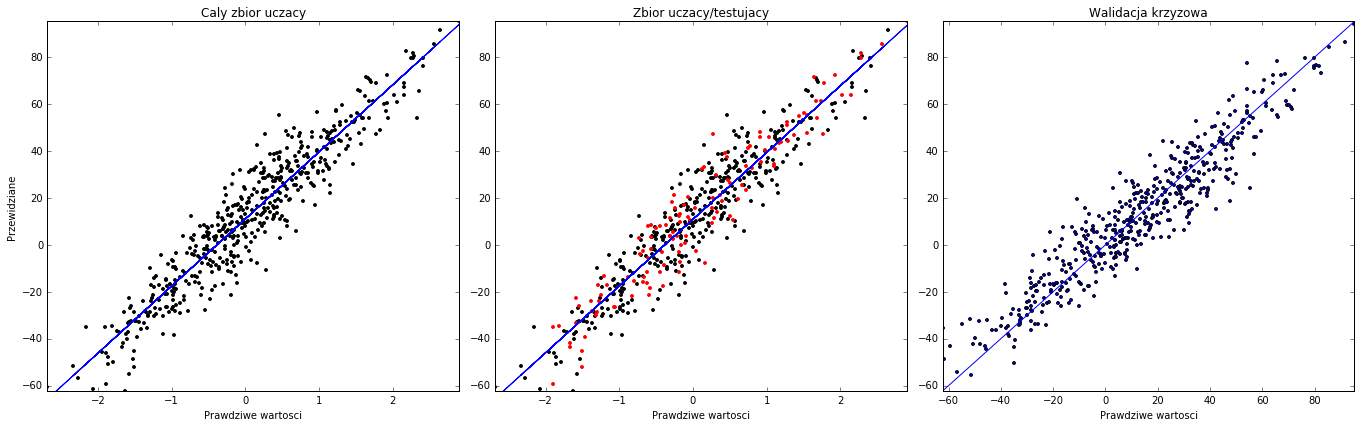

In [6]:
simple_linear_regression()

## Struktura geometryczna predykcji 

* punkty $(\hat{y}_k, x_{k1}, \dots, x_{kp})$ leżą na $p+1$ wymiarowej __hiperpłaszczyźnie__ 
* punkty leżą na $p+2$ wymiarowej hiperpłaszczyźnie jeśli dodatkowa wartość $1$ jest dodana do $x$
* liniowa regresja może być użyta nawet jeśli rzeczywista zależność danych generowanych przez system nie jest liniowa
* jakość predykcji zależy od szumu w systemie; inne rodzaje regresji mogą być skuteczniejsze gdy szum jest wysoki
  
  
* __warunek ortogonalności__ $$\mathbb{E}[x(y-\theta_\ast x)]=\mathbb{E}[xe_\ast]$$ mówi, że __błąd__ estymacji jest ortogonalny do przykładów

## Regresja liniowa wielowartościowa (multivariate)

* Regresję liniową można również wykorzystać do przypadków, gdy wartość celu (target) pojedynczego przykładu jest wektorem. 

In [7]:
def multivariate_linnerud_set():
    linn = load_linnerud()
    fig, ax = plt.subplots(3, 3, figsize=(18, 12))
    for i in range(3):
        ax[i, 0].set_ylabel(linn.target_names[i])
        ax[2, i].set_xlabel(linn.feature_names[i])
    for i in range(3):
        for j in range(3):
            ax[i, j].scatter(linn.data[:, i], linn.target[:, j], s=8)
    fig.tight_layout()
    lr = LinearRegression()
    lr.fit(linn.data, linn.target)
    print "Znalezione współczynniki estymacji:\n", lr.coef_

Znalezione współczynniki estymacji:
[[-0.47502636 -0.21771647  0.09308837]
 [-0.13687023 -0.04033662  0.0279736 ]
 [ 0.00107079  0.04202941 -0.02946117]]


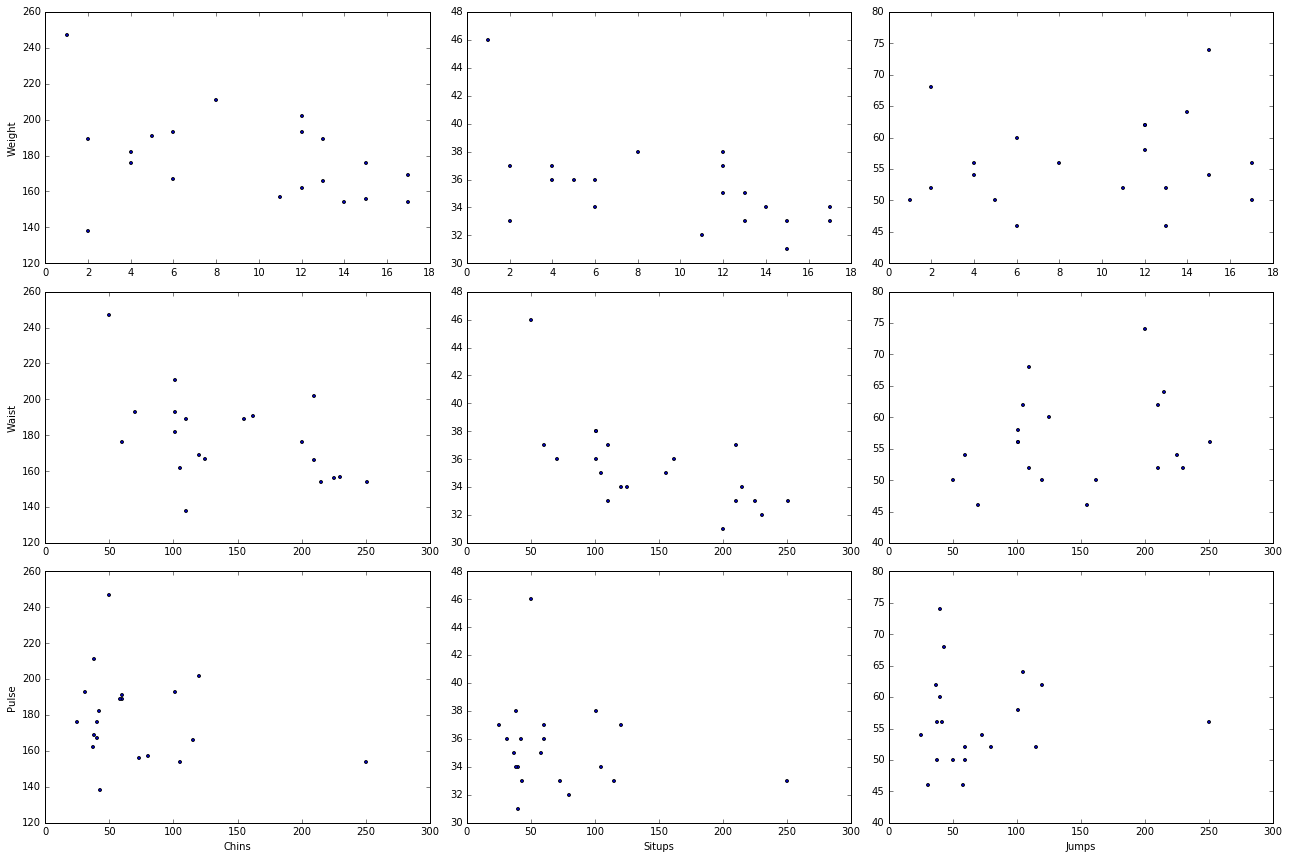

In [8]:
multivariate_linnerud_set()

In [9]:
def multivariate_regression():
    n_samples = 200 
    # data = make_friedman1(n_samples=n_samples)              ## koduje targety z wykorzystaniem wielomianów i sinusa (10 --> 1)
    # X, y = make_friedman2(n_samples=n_samples)              ## używa mnożenia i dzielenia cech wejsciowych (4 --> 1)
    # X, y = make_friedman3(n_samples=n_samples)              ## arctan na targecie (4 --> 1)
    X, y = make_sparse_uncorrelated(n_samples=n_samples)    ## liniowa kombinacja czterech wejść (4 --> 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    fig, ax = plt.subplots(2, 2, figsize=(22, 12))
    for i in range(2):
        for j in range(2):
            ax[i, j].scatter(X_train[:, 2 * i + j], y_train, s=16, c='blue')
            ax[i, j].scatter(X_test[:, 2 * i + j], y_test, s=16, c='red')
    fig.tight_layout()
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print "Linear regression score: {}".format(lr.score(X_test, y_test))
    sgd = SGDRegressor(loss='squared_loss', penalty='none', n_iter=500, verbose=0)
    sgd.fit(X_train, y_train)
    print "Stochastic gradient descent score: {}".format(sgd.score(X_test, y_test))


Linear regression score: 0.93436962933
Stochastic gradient descent score: 0.93440821398


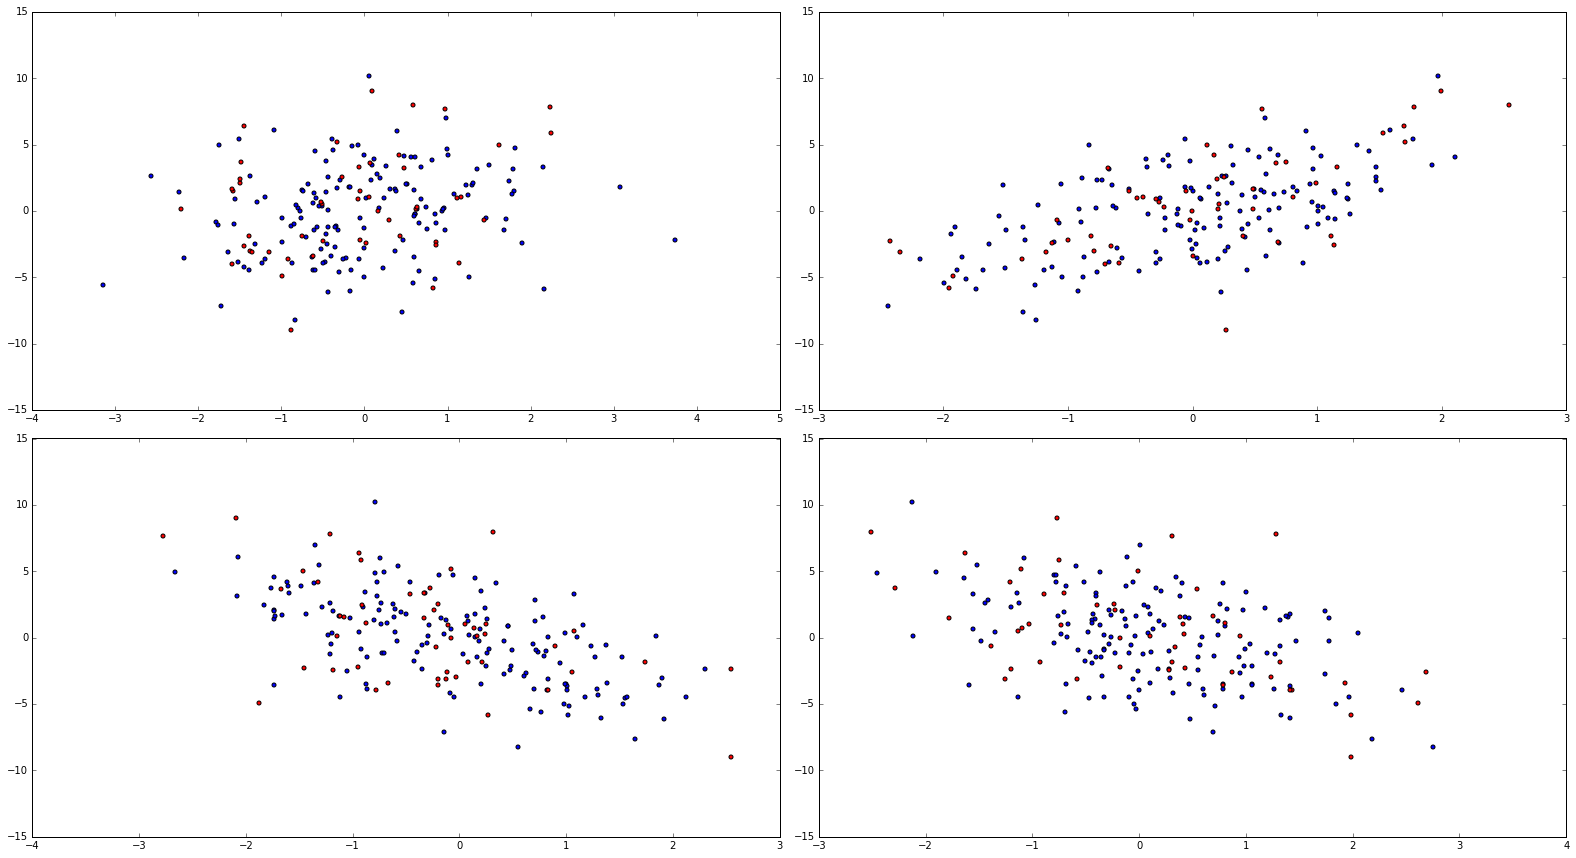

In [10]:
multivariate_regression()

## Mean Square Error

* Niech $\hat\theta$ będzie zmienną losową opisującą estymator, którego prawdziwą wartością jest $\theta_{opt}$ 
* Jeśli uzywamy kwadratowej funkcji kosztu, to _rozsądną_ miarą skuteczności estymatora będzie _mean-square error_ __MSE__ $$MSE=\mathbb{E}[(\hat\theta-\theta_{opt})^2]$$
gdzie średnia $\mathbb{E}$ jest brana po _wszystkich_ możliwych zbiorach danych o rozmiarze $N$
* Mała wartość $MSE$ powinna dawać skuteczny estymator

### Rozwiązanie dla problemu MSE

* Optymalne przybliżenie $y$ dla danego $x$ jest $\hat{y}=\mathbb{E}[y|x]$. Niech model $g(x)$ bedzie funkcją liniową

* Szukamy takiego $\theta$ dla $\hat{y}=\theta^Tx$, że $J(\theta)=\mathbb{E}[(y=\hat{y})^2]$ będzie __minimalne__, a więc
$$\boxed{\theta_\ast=\underset{\theta}{\arg\min}\;J(\theta)\;}$$
  * niech $(x, y)$ mają zerowe wartości oczekiwane
    * jeśli tak nie jest, to wartości średnie mogą być odjęte
    
    
* Celem estymatora jest minimalizacja zmiennej losowej błędu $$e=y-\hat{y}$$ 

* Minimalizacja funkcji kosztu odpowiada przyrównaniu jej gradientu do zera 

$$\begin{align}
\nabla{}J(\theta)&=\nabla\mathbb{E}[(y-\theta^Tx)(y-\theta^Tx)]\\
&=\nabla\left[\mathbb{E}[y^2]-2\theta^T\mathbb{E}[xy]+\theta^T\mathbb{E}[x x^T]\theta\right]\\
&=-2p+2\mathbb{E}[xx^T]\theta=0
\end{align},$$

gdzie $$p=\left[\mathbb{E}[x_1y],\mathbb{E}[x_2y],\dots,\mathbb{E}[x_py]\right]=\mathbb{E}[xy]$$
jest __macierzą kowariancji__ oraz układ równań 
$$\boxed{\mathbb{E}[x x^T]\theta_{\ast}=p\;}$$
  

* wagi optymalnego rozwiązania mogą być znalezione przez rozwiązanie układu równań,
* rozwiązanie istnieje jeśli macierz kowariancji jest _dodatnio określona_ i może być odwrócona,
* w takiej sytuacji rozwiązanie jest _unikalne_,
* w przeciwnej sytuacji istnieje nieskończenie wiele rozwiązań.

### Powierzchnia funkcji kosztu

$$\begin{align}
J(\theta)&=\mathbb{E}[(y-\hat{y})^2]=\sigma_y^2-2\theta^Tp+\theta^T\mathbb{E}[x x^T]\theta\\
&&\text{dodać/odjąć}\;\theta_{\ast}\mathbb{E}[x x^T]\theta_{\ast}\\
&=\sigma_y^2-2\theta^Tp+\theta^T\mathbb{E}[x x^T]\theta+\theta_{\ast}\mathbb{E}[x x^T]\theta_{\ast}-\theta_{\ast}\mathbb{E}[x x^T]\theta_{\ast}\\
&=\sigma_y^2-2\theta^Tp+\theta_{\ast}^T\mathbb{E}[xx^T]\theta_{\ast}+(\theta-\theta_{\ast})^T\mathbb{E}[xx^T](\theta-\theta_{\ast})\\
\\
&=J(\theta_{\ast})+(\theta-\theta_{\ast})^T\mathbb{E}[xx^T](\theta-\theta_{\ast})\\
\end{align}$$

bo z definicji $$p=\mathbb{E}[xy]$$
oraz z równania $$\mathbb{E}[x x^T]\theta_{\ast}=p$$  

<!-- mamy postać wartość funkcji kosztu w minimum
$$J(\theta_{\ast})=\sigma_y^2-p^T\mathbb{E}[xx^T]^{-1}p=\sigma_y^2-\theta_{\ast}\mathbb{E}[xx^T]\theta_{\ast}=\sigma_y^2-p^T\theta_{\ast}$$  -->
gdzie $\theta_\ast$ jest rozwiązaniem optymalnym
  
  
* z postaci $J(\theta_\ast)$ wynika, że jej wartość jest _zawsze_ niższa od wariancji $\mathbb{E}[y^2]$
  * $\mathbb{E}[xx^T]$ jest dodatnio określona a stąd $\theta_\ast\mathbb{E}[xx^T]\theta\ast>0$
  * poza wypadkiem gdy $p=\mathbb{E}[xy]=0$, ale wtedy $x$ i $y$ są nieskorelowane i __nic nie da się powiedzieć__ o $y$ na podstawie $x$, a stąd __niemożliwa jest jakakolwiek predykcja__!  
  
* dla $\theta\neq\theta_\ast$ wartość funkcji kosztu __rośnie__ (znowu dodatnia określoność $\mathbb{E}[xx^T]$)
  * funkcja kosztu definiowana przez $J()$ jest elipsoidą 
    * metody iteracyjne poruszają się po przestrzeni rozwiązań zdążając do minimum
  * kontury na isomapie funkcji kosztu są zdefiniowane przez wartości własne $\mathbb{E}[xx^T]$
  * jeśli $\mathbb{E}[xx^T]=\sigma^2I$ to kontury są okręgami
    * jeśli wykorzystujemy iteracyjny sposób rozwiązywania problemu, to w kolejnych krokach rozwiązanie będzie przemieszczać się w kierunku minimum
    * kształt isolinii pokazuje, że korzystna dla uczenia będzie __normalizacja__ zmiennych po poszczególnych współrzędnych

#### Interpretacja geometryczna

* dwa _nieskorelowane_ zmienne $$\mathbb{E}[xy]=0$$ będziemy nazywać __ortogonalnymi__ względem siebie
* rozwiązanie _liniowego_ estymatora można zapisać jako $$\hat{y}=\theta^Tx=\theta_1x_1+\dots+\theta_l x_l$$
  * wartość estymacji $\hat{y}$ będzie leżeć __na powierzchni__ rozpinanej przez przez te punkty
  * prawdziwa wartość $y$ z reguły _nie będzie_ leżeć na tej powierzchni
  * celem jest znalezienie dobrej estymacji, a więc zminimalizowanie normy __błędu__ $e=y-\hat{y}$, gdzie $$\|x\|=\sqrt{\mathbb{E}[x^2]}$$
  * to odpowiada żądaniu __ortogonalności błędu względem podprzestrzeni rozpinanej przez punkty__ $$\mathbb{E}[ex_k]=0\;\text{dla}\;k=1,\dots,l\tag{*}$$
  
  
  * rozpisując (*)
  $$\begin{align}
  \mathbb{E}\left[\left(y-\sum_{i=1}^l\theta_ix_i\right)x_k\right]=\mathbb{E}\left[x_ky-\sum_i\theta_ix_ix_k\right]=0
  \end{align}$$
  czyli $$\sum_{i=1}^l\mathbb{E}[x_ix_k]\theta_i=\mathbb{E}[x_ky]$$
  * ten zbiór liniowych równań jest nazywany _równaniami Wienera-Hopfa_
  

---

>Norbert Wiener był matematykiem i filozofem. Otrzymał doktorat z logiki matematycznej na Harwardzie w wieku 17 lat. W czasie II wojny światowej dał, niezależnie od Kołogorowa, podwaliny pod teorię estmacji liniowej. Pracował później przy automatyce i cybernetyce, sztucznej inteligencji, kognitywistyce. Ponieważ był pacyfistą, przez całe lata Zimnej Wojny był traktowany podejrzliwie <img src="wiener.png" width="40%"/>

### Przykład dla danych astronomicznych
* model ewolucji wszechświata
* relatywistyczny efekt Dopplera powoduje, że barwa obiektów (gwiazd) oddalających się od obesrwatora ma przesunięcie ku czerwieni
* odległość jasnościowa opisuje relację między prawdziwą a obserwowalną jasnością obiektów gwiezdnych
* obie są pewną parametryzacją obrazującą rozszerzanie się wszechświata
* na rysunku użyte są dane wygenerowane z pewnego modelu kosmologicznego opisujące supernowe
* jest także pewien ogólny model teoretyczny
  
  
* zastosowanie w modelu astronomicznym pokazuje wiele problemów
  * rzeczywiste dane nie mogą być przedstawione w postaci zamknietej ponieważ zawierają wariancję różną dla różnych obszarów (zwiększa się dla większych wartości przesunięcia ku czerwieni)
  * nie znamy rzeczywistej złożonosci modelu
  
* zastrzeżenie: model dofitowania poniżej nie bierze pod uwagę zmieniającej się niepewności danych, ich. _heteroskedastyczności_
  * wymaga zmiany modelu przez wprowadzenie macierzy wartości własnych macierzy kowriancji $X^TX$

In [11]:
def cosmo(n_examples=100, classifier = 'linear', loss='squared_loss', penalty='l1', degree_list=[3], scalecenter=True):
    if classifier != 'linear' and classifier != 'sgd':
        print 'classifier incorrectly set to {}'.format(classifier)
        return

    fig, ax = plt.subplots(figsize=(20, 14))

    z_sample, mu_sample, dmu = generate_mu_z(n_examples, random_state=0)
    cosmo = Cosmology()
    z = np.linspace(0.01, 2, 1000)
    mu_true = np.asarray(map(cosmo.mu, z))
    # znalezc prawdziwe wartosci mu_true dla wartosci z z_sample
    # potrzebne dla obliczenia generalizacji
#    mu_sample_true = get_nearest_true_values(x=z_sample, z=z, mu_true=mu_true)

    basis_mu = np.linspace(0, 2, 15)[:, None]
    basis_sigma = 3 * (basis_mu[1] - basis_mu[0])
    
    # TODO jak zamienic int na liste?
    # obliczenie dofitowań
#    degree_list = list(degree)
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink']
    len_colors = len(colors)

    for k, dgr in enumerate(degree_list):
        # ekspansja wielomianow
        poly = PolynomialFeatures(degree=dgr)
        # TODO dac opcje wyboru klasyfikatora takze na SGDRegression i mozliwosc regularyzacji
        if classifier == 'linear':
            clf = LinearRegression()
            classifier_name = 'LinearRegression()'
        elif classifier == 'sgd':
            clf = SGDRegressor(loss=loss, penalty=penalty, n_iter=500)
            classifier_name = "SGDRegression()"

        # obliczenie funkcji bazowych dla wszystkich przykladow
        X_sample = poly.fit_transform(z_sample[:, None])
        if scalecenter:
            # skalowanie i centrowanie
            scaler = preprocessing.RobustScaler().fit(X_sample)
            X_sample = scaler.transform(X_sample)
        # fit expanded
        clf.fit(X_sample, mu_sample)

        # obliczenie dofitowania do danych
        mu_sample_fit = clf.predict(X_sample)
        # skalowanie dla calego z
        X_z = poly.fit_transform(z[:, None])
        if scalecenter:
            X_z = scaler.transform(X_z)
        mu_fit = clf.predict(X_z)
        
        # blad dopasowanie do przykladow uczacych
        chi2_dof = (np.sum(((mu_sample_fit - mu_sample) / dmu) ** 2) / (len(mu_sample - 1)))
        # miara generalizacji
        true_chi2_dof = (np.sum(((mu_fit - mu_true)) ** 2) / (len(mu_true - 1)))

        ax.plot(z, mu_fit, '-', c=colors[k % len_colors], label=r'degree = {}, chi^2 = {}, gen = {}'.format(dgr, 
                                                                                               np.round(chi2_dof, 3),
                                                                                               np.round(true_chi2_dof, 3)
                                                                                              ))
        ax.plot(z, mu_true, '--', c='gray')
        ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
        print "{}: coef: {}".format(dgr, np.round(clf.coef_, 2))
        # print mu_sample[:4], '\n', mu_sample_fit[:4], '\n', mu_sample_true[:4]

        # ax.text(0.5, 0.05, r"$\chi^2_{\rm dof} = %.2f$" % chi2_dof, ha='center', va='bottom', transform=ax.transAxes)

    ax.set_xlim(0.01, 1.8)
    ax.set_ylim(36.01, 48)
    ax.set_xlabel('przesuniecie ku czerwieni')
    ax.set_ylabel('odleglosc jasnosciowa')
    ax.set_title('Wielomianowa regresja jasnosci wzgledem przesuniecia do podczerwieni gwiazd uzywajac {}'.format(classifier_name))
    ax.legend(loc=0)

1: coef: [ 0.    1.75]
2: coef: [ 0.    4.11 -1.6 ]
3: coef: [ 0.    7.05 -6.27  1.57]
4: coef: [  0.    10.87 -16.04   8.89  -1.67]
5: coef: [  0.    11.05 -16.68   9.69  -2.07   0.07]
6: coef: [  0.    13.91 -31.23  35.77 -23.32   8.12  -1.15]
7: coef: [  0.    10.46  -8.73 -18.35  39.97 -30.58  10.74  -1.45]
9: coef: [    0.     -13.04   264.54 -1235.4   2818.33 -3654.74  2815.7  -1272.65
   311.     -31.66]
11: coef: [  0.00000000e+00  -1.32700000e+01   4.27470000e+02  -2.94592000e+03
   1.02180600e+04  -2.11196200e+04   2.78051900e+04  -2.38987300e+04
   1.33440200e+04  -4.65830000e+03   9.22200000e+02  -7.89200000e+01]
15: coef: [  0.00000000e+00  -3.90000000e+00  -9.62040000e+02   1.79763600e+04
  -1.30389680e+05   5.25148120e+05  -1.34185092e+06   2.32449995e+06
  -2.82986643e+06   2.46483840e+06  -1.54260843e+06   6.87496340e+05
  -2.12671730e+05   4.33379900e+04  -5.22299000e+03   2.81470000e+02]
19: coef: [  0.00000000e+00  -1.68682000e+03   3.29047900e+04  -2.80207730e+05
 

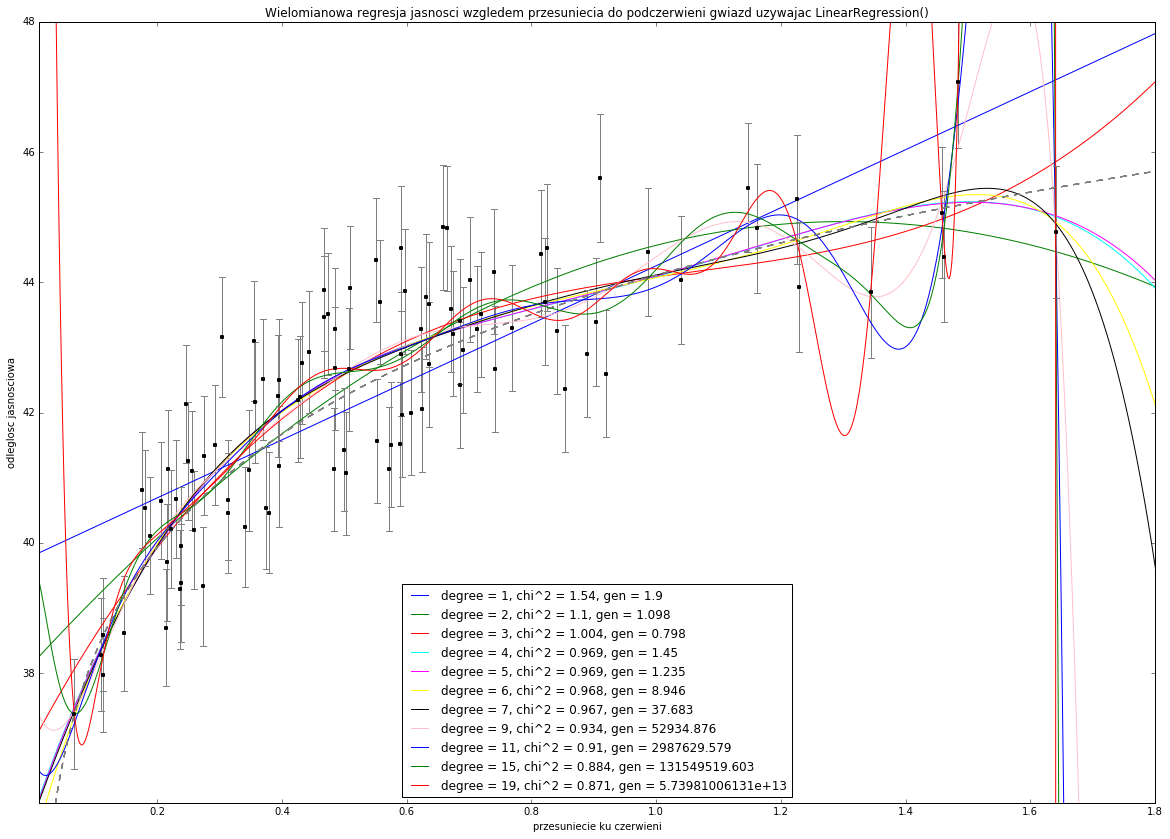

In [12]:
cosmo(n_examples=100, degree_list=[1, 2, 3, 4, 5, 6, 7, 9, 11, 15, 19], 
      classifier='linear', loss='squared_loss',
      scalecenter=True, penalty='none')

# Metoda stochastycznego spadku gradientu


* rozwiązywanie równań Wienera-Hopfa dla MSE __wymaga znajomości statystyk procesu__ dla uzyskania macierzy korelacji $\mathbb{E}[xx^t]$ i kowariancji $\mathbb{E}[xy]$
  * zwykle niedostępne
  * dostępne tylko przykłady uczące
* rozwiązaniem mogą być metody _online_ modyfikujące rozwiązanie przy każdym nowym przykładzie
  * uczenie następuje w sposób __iteracyjny__
  * są proste obliczeniowo
  * mają zdolność _adaptacji_ do _wolno_ zmieniających się procesów (stąd _metody adaptacyjne_)
  * są przydatne dla dużych problemów ponieważ dane __nie muszą__ być dostępne __jednocześnie__
  * rozwiązanie układu równań dla znalezienia $\theta_\ast$ poprzez $$\theta=(X^TX)^{-1}X^Ty$$ wymaga __odwrócenia__ macierzy $X^TX$, co jest bardzo złożone obliczeniowo
    * problem może być źle uwarunkowany

## Metoda spadku gradientu

* iteracyjna metoda minimalizacji funkcji kosztu $J(\theta),\;\theta\in\mathbb{R}^p$
  * rozpoczynając od $\theta^{(0)}$ 
  $$\boxed{\theta^{(i)}=\theta^{(i-1)}+\mu_i\Delta\theta^{(i)}\;}$$
  * wszystkie metody spadku gradientu mają taką postać różniąc się wyborem kroku $\mu_i$ oraz sposobem obliczania $\Delta\theta^{(i)}$
    * $J()$ __musi być różniczkowalna__!
  * spadek gradientu wybiera takie $\Delta\theta^{(i)}$ aby $$J(\theta^{(i)})<J(\theta^{(i-1)})$$
* wykorzystując, jak zawsze, rozwinięcie w szereg Taylora
$$J(\theta^{(i)})=J(\theta^{(i-1)}+\mu_i\Delta\theta^{(i)})\sim J(\theta^{(i-1)})+\mu_i\nabla^TJ(\theta^{(i-1)})\Delta\theta^{(i)}$$
  * wystarczy teraz wybrać taką zmianę, by $$\nabla^TJ(\theta^{(i-1)})\Delta\theta^{(i)}<0$$
    * to odpowiada rozwartemu kątowi między $\nabla\theta^{(i-1)}$ a $\Delta\theta^{(i)}$
    <img src="steepestdescent.png" width="95%"/>
    * wektor gradientu $\nabla J(\theta^{(i)})$ jest ortogonalny do płaszczyzny stycznej do krzywej o równych wartościch funkcji kosztu w miejscu $\theta^{(i)}$
    * kąt między gradientem a poprawką $\Delta\theta^{(i)}$ jest __rozwarty__ (taki kierunek poprawki jest wybrany na rysunku)
  * jeśli wartość $\mu_i\|\Delta\theta^{(i)}\|$ będzie __zbyt duża__, to nowa wartość $\theta^{(i)}$ może znaleźć się po _drugiej stronie krzywizny_
    * rozwinięcie Taylora będzie prawdziwe tylko dla małych rozwinięć

### Metoda największego spadku gradientu

1. jaki jest najlepszy kierunek wzdłuż którego należy się poruszać?
  * największy spadek wartości funkcji kosztu daje kierunek __przeciwny do wektora gradientu__, stąd metoda __największego spadku gradientu__ (ang. steepest descent)
  $$\boxed{\theta^{(i)}=\theta^{(i-1)}-\mu_i\nabla J(\theta^{(i-1)})\;}$$
2. jaki jest najlepszy możliwy krok?
  * zbyt duży krok może spowodować przeskoczenie minimum

### Tryby metody spadku gradientu

* __batch__: dla danego $\theta^{(i-1)}$
  * dla wszystkich przykładów $x_n$ obliczyć wartość wynikającej z nich poprawki $\Delta\theta^{(i)}(x_n)$
  * poprawki uśrednić i obliczyć nowe $\theta^{(i)}$
  * metoda dokładna ale powolna, szczególnie dla dużych zbiorów danych
* __przykład po przykładzie (stochastyczny)__: dla $\theta^{(i-1)}$
  * wylosować przykład $x_n$
    * zwykle przykłady brane są po kolei, ale wcześniej pomieszane by uniknąć schematów w zbiorze danych
  * obliczyć $\Delta\theta^{(i-1)}(x_n)$ i zmodyfikować $\theta^{(i-1)}$
  * mniej dokładna ale
    * poprawka dla losowego przykładu zwykle zmierza w prawie tym samym kierunku co obliczona dla całego zbioru przykładów
    * to znacznie przyspiesza uczenie
    * są jednak pewne niedokładności i możliwość meandrowania
* __mini_batch__
  * zbiór uczący podzielić na małe podzbiory przykładów, zwykle $10-20$
  * zaaplikować podejście batdch _ale_ do kolejnych mini-batchy
  * lepsze uśrednienie kierunku poprawy
  * podejście optymalne

In [13]:
def stochastic_gradient_regression():
    # SGDRegressor jest metodą stochastycznego spadku gradientu
    fig, ax = plt.subplots(1, 3, figsize=(22, 8))
    n_samples = 500
    bias = 10.0
    X, y, true_coef = make_regression(n_samples=n_samples, n_features=1, n_targets=1, bias=bias, noise=10.0, coef=True)
    for i in range(2): ax[i].set_xlabel('x'); ax[i].set_ylabel('y')
    for i in range(2): ax[i].set_xlim((np.min(X), np.max(X))); ax[i].set_ylim([np.min(y), np.max(y)])

    regr = SGDRegressor(loss='squared_loss', penalty='none', n_iter=100, verbose=0)
    regr.fit(X, y)
    print "Cały zbiór uczący"
    print "\ttrue/znalezione wsp.: {}/{}, bias = {}".format(true_coef, regr.coef_, bias)
    print "\tresidual error =", np.mean((regr.predict(X) - y) ** 2)
    print "\tscore =", regr.score(X, y)
    ax[0].scatter(X, y, color='black', s=8)
    ax[0].plot(X, regr.predict(X), color='blue', linewidth=1)
    ax[0].set_title('Stochastic gradient descent na calych sanych')
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    regr.fit(X_train, y_train)
    print "train/test model"
    print "\ttrue/znalezione wsp.: {}/{}, bias = {}".format(true_coef, regr.coef_, bias)
    print "\tresidual error =", np.mean((regr.predict(X_test) - y_test) ** 2)
    print "\tscore =", regr.score(X, y)
    ax[1].scatter(X_train, y_train, color='black', s=8)
    ax[1].scatter(X_test, y_test, color='red', s=8)
    ax[1].plot(X, regr.predict(X), color='blue', linewidth=1)
    ax[1].set_title("Stochastic gradient descent na train/test split danych")

    # ewaluacja wyników przez walidację krzyżową
    pred = cross_val_predict(regr, X, y, cv=10)
    ax[2].set_xlim([np.min(y), np.max(y)])
    ax[2].set_ylim([np.min(y), np.max(y)])
    ax[2].plot([y.min(), y.max()], [y.min(), y.max()], lw=1)
    ax[2].scatter(y, pred, s=8)
    ax[2].set_title("Stochastic gradient descent z walidacja krzyzowa")
    
    for i in range(3):
        ax[i].set_xlabel("Prawdziwe wartosci")
    ax[0].set_ylabel("Przewidziane")

    fig.tight_layout()

Cały zbiór uczący
	true/znalezione wsp.: 47.4186094577/[ 46.76281214], bias = 10.0
	residual error = 92.8870235637
	score = 0.958930479858
train/test model
	true/znalezione wsp.: 47.4186094577/[ 46.52771228], bias = 10.0
	residual error = 72.7907270264
	score = 0.95886634309


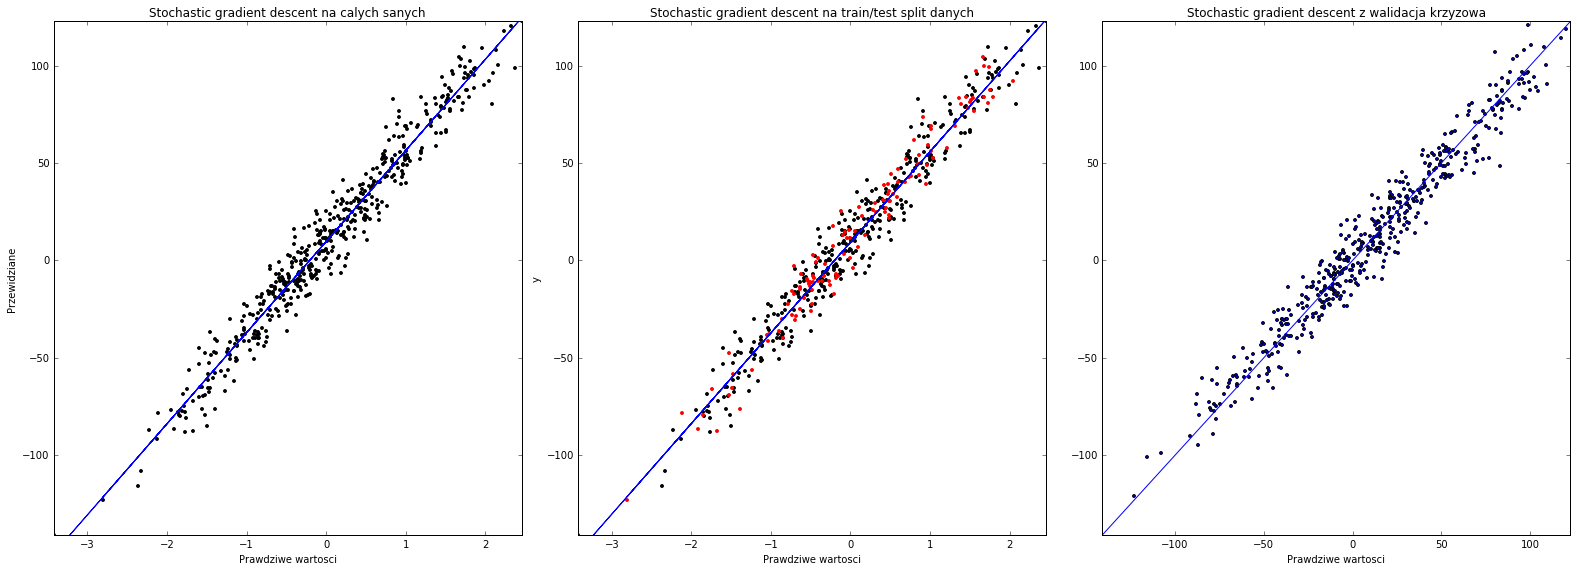

In [14]:
stochastic_gradient_regression()

### Warunki zbieżności procesu iteracyjnego dla metody najmniejszych kwadratów

* Funkcja kosztu ma postać i jej pochodna 
$$\begin{align}J(\theta)&=\mathbb{E}[(y-\hat{y})^2]=\sigma_y^2-2\theta\mathbb{E}[xy]+\theta^T\mathbb{E}[xx^T]\theta\\
\nabla J(\theta)&=2\mathbb{E}[xx^T]\theta-2\mathbb{E}[xy]
\end{align}$$
* poprawki według spadku gradientu (włączając $2$ do $\mu$)
$$\begin{align}\theta^{(i)}&=\theta^{(i-1)}-\mu(\mathbb{E}[xx^T]\theta^{(i-1)}-\mathbb{E}[xy])\\
&=\theta^{(i-1)}+\mu(\mathbb{E}[xy]-\mathbb{E}[xx^T]\theta^{(i-1)})\end{align}$$  

  * niech $c^{(i)}=\theta^{(i)}-\theta_\ast$ będzie __optymalną__ poprawką osiągającą minimum
  * niech $p=\mathbb{E}[xy]$
  * niech $\Sigma_x=\mathbb{E}[xx^T]$
  * z równań Wienera-Hopfa wiemy, że $\Sigma_x\theta_\ast=p$ (to _są_ równania W-H)
  * odejmująć $\theta_\ast$ od obu stron
  $$\begin{align}
  c^{(i)}=\theta^{(i)}-\theta_\ast&=\theta^{(i-1)}-\theta_\ast+\mu(p-\Sigma_x\theta^{(i-1)})\\
  &&c^{(i-1)}=\theta^{(i-1)}-\theta_\ast\\
  &&\theta^{(i-1)}=c^{(i-1)}+\theta_\ast\\
  &=\theta^{(i-1)}-\theta_\ast+\mu(p-\Sigma_xc^{(i-1)}-\Sigma_x\theta_\ast)\\
  &=c^{(i-1)}+\mu(p-\Sigma_xc^{(i-1)}-\Sigma_x\theta_\ast)\\
  &=c^{(i-1)}-\mu\Sigma_xc^{(i-1)}\\
  &=(I-\mu\Sigma_x)c^{(i-1)}\\
  \end{align}$$  
  
  
  * macierz $\Sigma_x$ jest symetryczna i dodatnio określona, stąd $\Sigma_x=Q\Lambda Q^T$ a stąd $Q^T=Q^{-1}$  
  
  $$\begin{align}
  c^{(i)}&=Q(I-\mu\Lambda)Q^Tc^{(i-1)}\\
  &&\text{lewostronnie przez}\;Q^T\\
  Q^Tc^{(i)}&=Q^TQ(I-\mu\Lambda)Q^Tc^{(i-1)}\\
  v^{(i)}&=(I-\mu\Lambda)v^{(i-1)}\\
  \end{align}
  $$  
  
  
  * jaka jest zależność $v^{(i)}$ od poprzednich wartości?
  $$v^{(i)}_j=(1-\mu\lambda_j)v^{(i-1)}_j=(1-\mu\lambda_j)(1-\mu\lambda_j)v^{(i-2)}_j=\dots=(1-\mu\lambda_j)^iv^{(0)}_j$$  
  * to jest ciąg geometryczny
    * $$\boxed{\text{jeśli ciąg}\; v^{(i)}\longrightarrow0 \;\text{to}\; \theta^{(i)}\longrightarrow\theta_\ast\;}$$
    * warunkiem na to jest, by $|1-\mu\lambda_j|<1$
    * co jest równoważne by $$\boxed{0<\mu<\dfrac{2}{\lambda_\max}\;}$$ gdzie $\lambda_\max$ jest największą wartością własną $\Sigma_x$

In [15]:
def draw_mu_dependent_mse(lmbd = 0.25, eps = 0.10, steps=30):
    fig, ax = plt.subplots(1, 1, figsize=(20, 12))
    v0 = 1.
    steps = 30
    mu_vals = [0.1, 0.5, 1.0, (1. / lmbd), (1.1 / lmbd - eps)]
    colors = ['red', 'blue', 'magenta', 'violet', 'black']
    for mu, col in zip(mu_vals, colors):
        ax.plot(range(steps), [v0 * (1. - mu * lmbd) ** i for i in range(steps)],
                color=col, label=r"$\mu$ = {}".format(mu))

    for mu, col in zip(mu_vals, colors):
        #tau = -1 / np.log(1. - mu * lmbd)
        tau = 1 / (mu * lmbd)
        ax.plot(range(steps), [np.exp(-float(i) / tau) ** i for i in range(steps)], 
                c=col, ls='--', label=r"$\exp(-t/\tau), \tau$={}".format(tau))
    ax.legend(loc=0)

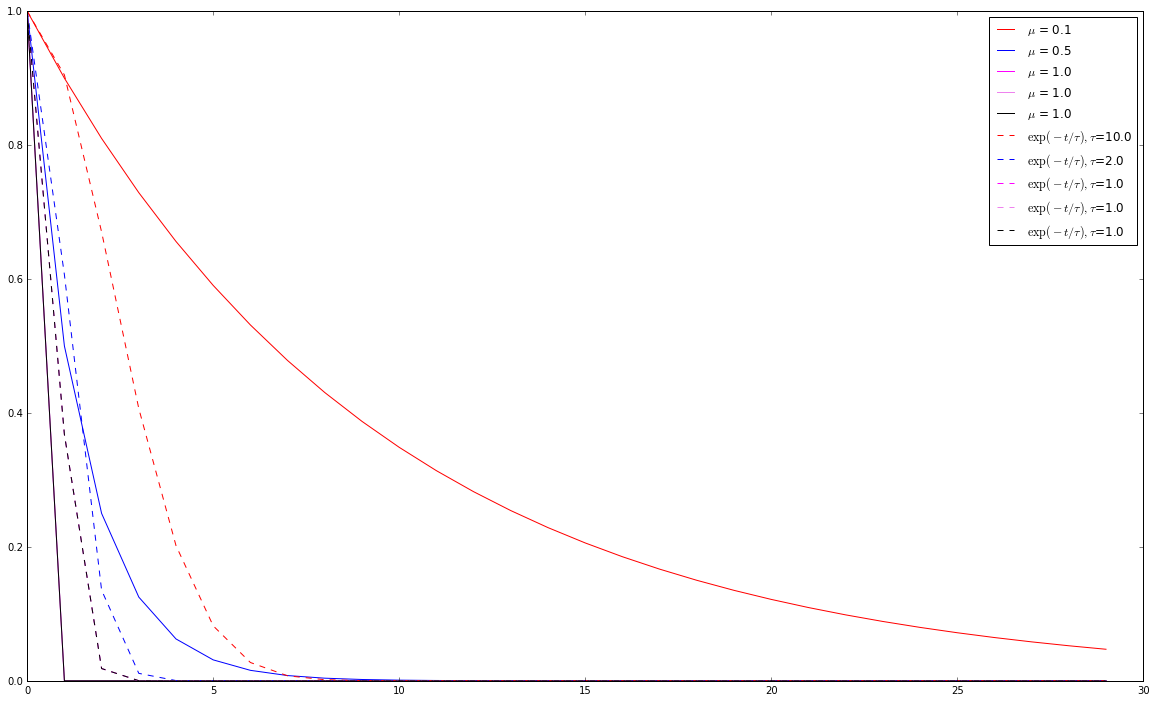

In [16]:
draw_mu_dependent_mse(lmbd=1.0)

* najwolniej maleć będzie składnik $v^{(i)}_j$ o odpowiadającemu najmniejszej wartości własnej
* prędkość zbieżnośći $v^{(i)}_j$ zależy od wartości $\lambda_\max$ ale także od wartości najmniejszej $\lambda_\min$
* __optymalnym__ wyborem będzie $$\mu_{opt}=\frac{2}{\lambda_\min+\lambda_\max}$$  
  
  
  * duży rozrzut wartości własnych powoduje zwykle znaczne spowolnienie zbieżności
  * niech wartości własne macierzy kowariancji $\Sigma_x=\mathbb{E}[xx^T]$ są __równe__
    * izolinie funkcji kosztu mają postać okręgów
    * optymalna wartość to wtedy $\mu=1/\lambda$
    * wartość minimalna $\theta_\ast$ jest osiągana w __pojedynczym kroku__
  
* zbyt wysoka wartość $\mu$ może powodować __oscylacje__ w przestrzeni rozwiązań


#### Zmieniająca się wartość kroku

* krok może się zmieniać z iteracji na iterację
* algorytm spadku gradientu jest zbieżny pod warunkiem, że
  * $\mu_i\longrightarrow0\;\;\text{gdy}\;\;i\longrightarrow\infty$
  * $\sum_{i=1}^\infty\mu_i=\infty$
  
  
* typowe rozwiązanie spełnia warunki
  * $\sum_{i=1}^\infty\mu_i^2<\infty$
  * $\sum_{i=1}^\infty\mu_i=\infty$
  
  
* takim rozwiązaniem może być $$\mu_i=\frac{1}{i}$$
  * krok maleje z każdą iteracją
  * nie może się to dziać zbyt szybko
    * w takiej sytuacji zmiany zanikają już po kilku iteracjach
    
    
* to rozwiązanie dla problemów stacjonarnych
  * jeśli problem zmianiałby się, to algorytm __nie byłby w stanie__ adaptować się po spadku $\mu_i$

# Least Mean Squares

## Modele liniowe - rozszerzenie przez funkcje bazowe

* model liniowej regersji jest bardzo ograniczony
$$\hat{y}(x;\theta)=\theta_0+\theta_1x_1+\dots+\theta_px_l=\theta_0+\theta^T{}x+\eta[\theta_0,\theta]^T[1,x]+\eta=\theta^Tx,$$ 
  
  
* rozszerzenie jako kombinację liniową
$$\hat{y}(x;\theta)=\theta_0+\sum_j\theta_j\phi_j(x)=\theta^T\phi(x),$$ gdzie $\phi_j()$ są znanymi __funkcjami bazowymi__
  * __UWAGA__: indeksowanie $j$ jest po liczbie funkcji bazowych, nie po wektorze danych!
  * _nieliniowe_ funkcje bazowe pozwolą modelować _nieliniowe_ zależności zmienne zależnej od argumentów
    * w dalszym ciągu taki model jest silnie ograniczony
  * __UWAGA__: model jest __liniowy__ w sensie liniowości względem $\theta$
  
  
  * regresja __wielomianowa__: $$\phi_j(x)=x^j$$
  * __"gausowskie"__ funkcje bazowe $$\phi_j(x)=\exp\left(-\frac{(x-\mu_j)^2}{2\sigma^2}\right)$$
  * __sigmoidalne__ f. bazowe $$\phi_j(x)=\sigma\left(\dfrac{x-\mu_j}{\sigma}\right)\;\;\;\sigma(v)=\frac{1}{1+\exp(-v)}$$
  * fourierowskie, f. falkowe, etc.
  
  
* dobry wybór funkcji bazowych pozwala na dobre dopasowanie do danych nawet przy założeniu modelu liniowego __w parametrach__
  * funkcje bazowe są jednak ustalone z góry
  * liczba funkcji bazowych rośnie zwykle wykładniczo wraz z wymiarem przestrzeni wejściowej
  * można ograniczyć się do funkcji __lokalnych__ które zmieniają wartości __tylko__ w otoczeniu punktów danych i __rzeczywistej__ przestrzeni danych
    * dane dla konkretnego problemu __nie wypełaniają całej $d$-wymiarowej przestrzeni__
    * należą do podprzestrzeni charakterystycznej dla tego problemu
    * zadanie uczenia maszynowego jest poniekąd ewaluacja gęstości tej przestrzeni
  * inne modele modyfikują wybór
    * SVM tak pracują
    * sieci neuronowe dopasowują parametry funkcji bazowych

In [17]:
def draw_basis_functions(n = 10):
    fig, ax = plt.subplots(1, 3, figsize=(22,7))
    x = np.arange(-1, 1, 0.05)
    for k in range(1, n):
        ax[0].plot(x, x ** k)
        ax[0].set_title('wielomianowe')
        ax[1].plot(x, np.exp(-((x - (2 * float(k) / float(n) - 1.)) ** 2) / 0.05))
        ax[1].set_title('gausowskie')
        ax[2].plot(x, 1. / (1. + np.exp(-(x - (2 * float(k) / float(n) - 1.)) / 0.05)))
        ax[2].set_title('sigmoidalne')

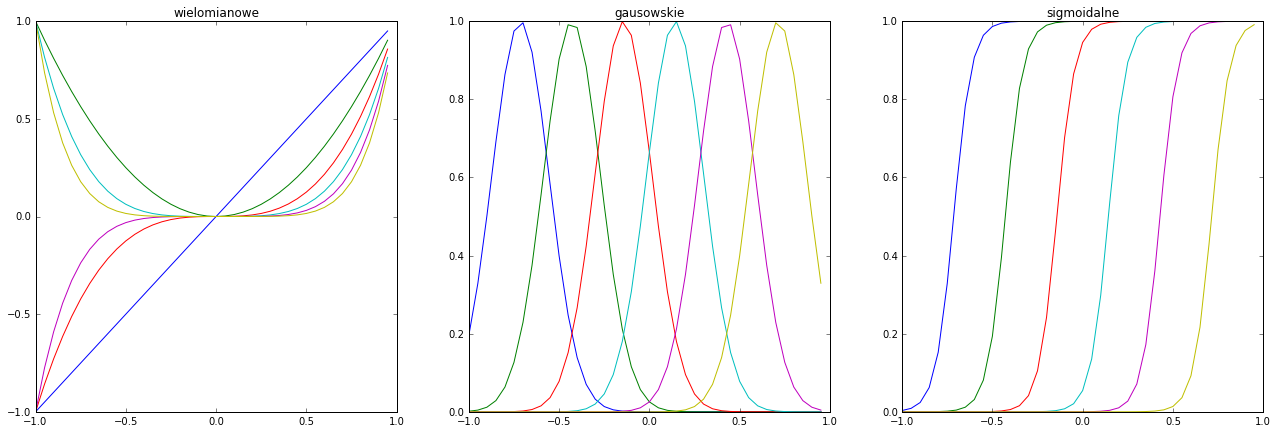

In [18]:
draw_basis_functions(n=7)

## Maximum likelihood

* wartość poszukiwana $y$ jest dana przez 
$$\boxed{y=y(x;\theta)+\eta=\hat{y}+\eta\;}$$
gdzie $\eta$ jest szumem o zerowej wartości średniej i wariancji $\sigma$
* prawdopodobieństwo warunkowe $y$
$$p(y|x, w, \sigma)=\mathcal{N}(y|y(x;\theta),\sigma)$$
  
* optymalnym rozwiązaniem jest wartość oczekiwana $$\mathbb{E}[y|x]=\int y p(y|x) dy = y(x;\theta)$$
  
  
* niech dany będzie zbiór uczący $$\{(x_k,y_k)\}_{k=1}^N\subset{}X\times{}Y$$ ($x_k$ jest tu $k$-tym przykładem) 
* ponieważ przykłady są wylosowane _niezależnie_, to można zdefiniować __funkcję liklihood__
$$p(Y|X,\theta,\sigma)=\prod_{k=1}^N \mathcal{N}(y_k|\theta^T\phi(x_k), \sigma)$$
gdzie
$$\mathcal{N}(y_k|\theta^T\psi(x_k),\sigma^2)=\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\left(\frac{1}{2\sigma^2}(y_k-\theta^T\psi(x_k))^2\right)
$$
  
* biorąc __logarytm__ uzyskujemy funkcję __log-likelihood__ i zamieniamy iloczyn na sumę!
$$\begin{align}
\ln p(y|\theta,\sigma)&=\sum_{k=1}^N\ln\mathcal{N}(y_k|\theta^T\phi(x_k),\sigma)\\
&=-\frac{N}{2}\ln\sigma^2-\frac{N}{2}\ln(2\pi)-\frac{\sigma^2}{2}\sum_{k=1}^N\left(y_k-\theta^T\phi(x_k)\right)^2
\end{align}$$
  * pierwsze dwa składniki są stałe (dla danego zbioru uczącego)
  * maksymalizacja likelihood oznacza _minimalizację_ sumy kwadratów
  * gradient funkcji likelihood jest przyrównywany do zera
  $$\begin{align}
  %\nabla\ln p(y|\theta,\sigma)&=\sum_{k=1}^N\left(y_k-\theta^T\phi(x_k)\right)\phi(x_k)^T\\
  0=\nabla\ln p(y|\theta,\sigma)&=\sum_{k=1}^N\left(y_k-\theta^T\phi(x_k)\right)\phi(x_k)^T\\
  &=\sum_{k=1}^Ny_k\phi(x_k)^T-\theta^T\left(\sum_{k=1}^N\phi(x_k)\phi(x_k)^T\right)
  \end{align}$$
  
  
  * to daje rozwiązanie __problemu najmniejszych kwadratów__ $$\boxed{\;\hat\theta=(\Phi^T\Phi)^{-1}\Phi^Ty\;}$$
  gdzie $$\Phi=\begin{pmatrix}
  \phi_{1}(x_{1}) & \phi_{2}(x_{1}) & \cdots & \phi_{M}(x_{1}) \\
  \phi_{1}(x_{2}) & \phi_{2}(x_{2}) & \cdots & \phi_{M}(x_{2}) \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \phi_{1}(x_{N}) & \phi_{2}(x_{N}) & \cdots & \phi_{M}(x_{N}) 
 \end{pmatrix}$$
 
 
 * macierz $$\Phi^\dagger=(\Phi^T\Phi)^{-1}\Phi^T$$ jest zwana __macierzą Moora-Penrose'a__
   * uogólnienie macierzy odwrotnej dla macierzy nie kwadratowych
   * dla odwracalnej macierzy kwadratowej $\Phi^\dagger=\Phi^{-1}$
   
   ---
   
   > __PROBLEM__:
   
   > W rozważaniach powyżej znalezione zostały $\theta_j$ dla wszystkich funkcji bazowych $\phi_j$. Jednak dla $j=0$
   mamy z definicji $\phi_0()=1$.
   
   > Jaka jest wartość $\theta_0$? Czemu odpowiada? Jak ją zinterpretować?
   
   >Wskazówka: powtórzyć liczenie pochodnej ze składnikiem $\theta_0$ podanym _explicite_ i zminimalizować ze względu na $\theta_0$
   
   
  * parametr $\sigma$ jest odpowiedzialny za precyzję rozwiązania
  * jego optymalizacja daje $$\hat\sigma=\frac{1}{N}\sum_{k=1}^N\left(y_k-\hat\theta^T\phi(x_k)\right)^2$$

In [19]:
def compare_regressors():
    n_samples = 200 
    # data = make_friedman1(n_samples=n_samples)              ## koduje targety z wykorzystaniem wielomianów i sinusa (10 --> 1)
    # X, y = make_friedman2(n_samples=n_samples)              ## używa mnożenia i dzielenia cech wejsciowych (4 --> 1)
    # X, y = make_friedman3(n_samples=n_samples)              ## arctan na targecie (4 --> 1)
    X, y = make_sparse_uncorrelated(n_samples=n_samples)    ## liniowa kombinacja czterech wejść (4 --> 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    fig, ax = plt.subplots(1, 2, figsize=(18, 9))

    names = ['LinearRegression()', 'SGDRegressor()']
    regressors = [LinearRegression(), SGDRegressor(loss='squared_loss', penalty='none', n_iter=500)]
    for k, lr in enumerate(regressors):
        predicted = cross_val_predict(lr, X, y, cv=10)
        score = mean_squared_error(y, predicted)
        ax[k].set_title(names[k])
        ax[k].set_xlabel('true')
        ax[k].set_ylabel('predicted')
        ax[k].scatter(y, predicted, s=8)
        ax[k].plot([y.min(), y.max()], [y.min(), y.max()], ls='--', lw=2, label='score = {}'.format(score))
        ax[k].set_xlim([y.min(), y.max()])
        ax[k].set_ylim([y.min(), y.max()])
        ax[k].legend(loc=0)

    fig.tight_layout()


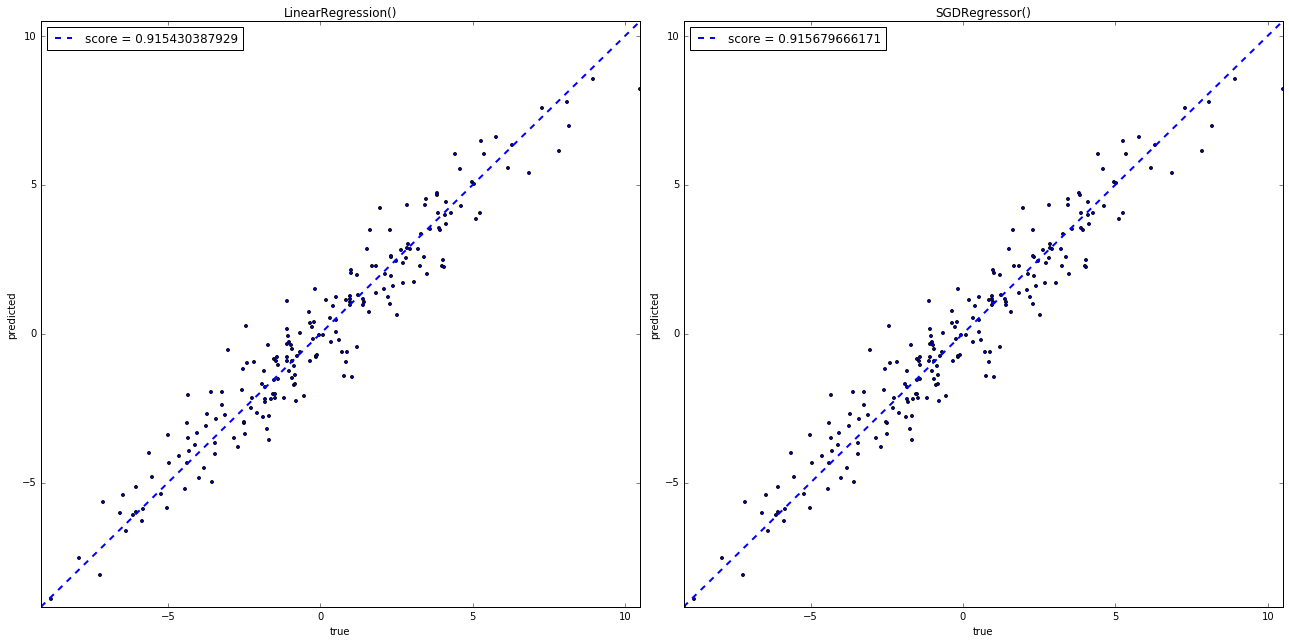

In [20]:
compare_regressors()

### Uczenie sekwencyjne

* uczenie wykorzystujące metodę __maximum likelihood__ jest zwykle kosztowne dla dużych zbiorów danych
  * wymaga przetworzenia __całego__ zbioru danych w jednym przebiegu dla obliczenia macierzy $\Phi$
  
  
* algorytm __Least Mean Squares LMS__ bierze __jeden przykład__ za każdym razem modyfikując wektor parametrów 
$$\boxed{\begin{align}
  \hat\theta^{(t)}&=\hat\theta^{(t-1)}+\mu\left(y_n-\hat\theta^{(t-1)T}\phi(x_n)\right)\phi(x_n)\\
  &=\hat\theta^{(t-1)}+\mu{}e\phi(x_n)\\&
\end{align},\;}$$
gdzie $$e=\left(y_n-\hat\theta^{(t-1)T}\phi(x_n)\right)$$ jest błędem w kroku $t-1$
* wartość współczynnika nauczania $\mu$ w LMS jest __stała__
  * jeśli $\mu_t$ będzie maleć, to po osiągnięciu małego błędu algorytm __nie będzie__ reagować na nowe błędy
    * istotne gdy statystyki problemu mogą się zmieniać w trakcie uczenia
    * problem nie jest __stacjonarny__
  * $\mu$ musi być dobrane bardzo ostrożnie

### Modele parametryczne vs. nie-parametryczne

* model __parametryczny__ może być opisany (sparametryzowany) skończoną liczbą parametrów $$\mathcal{H}=\{f(x;\theta):\;\theta\in\Theta\subset\mathbb{R}\}$$
  * wszystkie parametry modelu pochodzą ze skończonych przestrzeni
  
  
* model __nie-parametryczny__ nie może być opisany skończoną liczbą parametrów
  * parametry pochodzą z nieskończonych przestrzeni

# Regularyzacja

## Definicja zadania
* _regularyzacja_ nakłada pewną wiedzę _a priori_ na strukturę rozwiązania
> Pierwszy raz zaproponowana przez Andrieja Nikołajewicza Tichonowa (1906-1993) <img src="tychonoff.png" width="27%"/>
  
* inne postawienie zadania najmniejszych kwadratów
  * minimalizuj $J(\theta)=\sum_{n=1}^N\left(y_n-\theta^Tx_n\right)^2$
  * z ograniczeniem $\|\theta\|^2\leq\rho$
  
* zadanie nie ma teraz _całkowitej swobody_ w woborze rozwiązania
* przestrzeń możliwych rozwiązań jest __ograniczona__
  
  
* znalezienie __optymalnego $\rho$__ nie jest możliwe do znalezienia analitycznie
  * potrzeba szeregu doświadczeń
  
  
* równoważnie zadanie __ridge regression__ (zwane także __weight decay__ oraz regularyzacją __L2__)
$$\boxed{\hat\theta = \underset{\theta}{\arg\min}\;\;\frac{1}{2}\sum_{n=1}^N\left(y_n-\theta^Tx_n\right)^2+\lambda\|\theta\|\;}$$
  * weight decay, bo minimalizuje parametry o ile te nie są poparte danymi
  * istnieje bezpośrednia relacja miedzy $\rho$ a parametrem $\lambda$
  * im większe $\lambda$, tym silniejsze osłabianie
  
  
* przyrównując gradient $L()$ do zera otrzymujemy rozwiązanie
$$\begin{align}
\nabla{}L(\theta, \lambda)&=-\sum_n(y_n-\theta^Tx_n)x_n+\lambda\theta\\
&=-\sum_ny_nx_n +\sum_n\theta^Tx_nx_n^T+\lambda\theta=0\\
\left(\sum_nx_nx_n^T+\lambda{}I\right)\hat\theta&=\sum_ny_nx_n
\end{align}$$
regularyzowane problemu jak w [rozwiązaniu maximum likelihood](Maximum-likelihood) (tam dla uogólnionego zadania modeli liniowych)
$$\hat\theta=(X^TX+\lambda{}I)^{-1}X^Ty$$
  * takie podejście jest również rozwiązaniem problemu gdy macierz jest nieodwracalna 
    * zwiększenie szansy, że macierz będzie odwracalna było pierwszym celem wprowadzenia tego rozwiązania!
  
  
* ridge regression modyfikuje parametry $\theta_j$ tak, by minimalizować koszt rozwiązania redukując wpływ __mniej istotnych__ (ang. _less informative_) kierunków przestrzeni wejściowej
  * składnik biasu $\theta_0$ __nie powinien__ byc minimalizowany
  $$\boxed{\hat\theta = \underset{\theta}{\arg\min}\;\; \frac{1}{2}\sum_{n=1}^N\left(y_n-\theta_0-\sum_{j=1}^l\theta_ix_{ni}\right)^2+\lambda\sum_{j=1}^l\theta_j\;}$$
    * Dlaczego? Patrz rozwiązanie PROBLEMu
  * regularyzacja modelu z funkcjami bazowymi $$\sum_{j=1}^M\theta_j\phi_j(x)$$ powoduje __usunięcie__ mniej istotnych składowych i efektywnie obniża $K$
  

  
* regularyzacja jest zgodna z wymaganiem by zawsze wybierać __najprostszy model, który wystarczająco dobrze tłumaczy zjawiska__
  * __Brzytwa Ockhama__ _Nie mnóż bytów ponad konieczność_ (przypisywane Williamowi of Ockham, c. 1287-1347)
  * __Paul Dirac__ (1902-1984) _Teoria, która jest piękna matematycznie, ma większą szansę by być prawdziwa od tej brzydkiej, która dobrze pasuje do danych_ 
><div id="occamdirac"><img src="occam.png" width="30%" /> <img src="dirac.png" width="30%" /></div>
  

In [21]:
from sklearn.utils.extmath import randomized_svd
def singular_values(X):
    U, sigma, VT = randomized_svd(X, X.shape[1])
    return sigma

In [22]:
def compute_df(sigmas, lmbd):
    return np.sum([s ** 2 / (s ** 2 + lmbd) for s in sigmas])

In [23]:
def regression_regularization(data='sparse', n_samples=200, sss=4, 
                              penalty_mode='l2', n_iter=500):
    if data == 'boston':
        bostondiabetes = load_boston()
        X = bostondiabetes.data
        y = bostondiabetes.target
    elif data == 'diabetes':
        bostondiabetes = load_diabetes()
        X = bostondiabetes.data
        y = bostondiabetes.target
    elif data == 'friedman1':
        X, y = make_friedman1(n_samples=n_samples)              ## koduje targety z wykorzystaniem wielomianów i sinusa (10 --> 1)
    elif data == 'friedman2':
        X, y = make_friedman2(n_samples=n_samples)              ## używa mnożenia i dzielenia cech wejsciowych (4 --> 1)
    elif data == 'friedman3':
        X, y = make_friedman3(n_samples=n_samples)              ## arctan na targecie (4 --> 1)
    elif data == 'sparse':
        X, y = make_sparse_uncorrelated(n_samples=n_samples)    ## liniowa kombinacja czterech wejść (4 --> 1)
    elif data == 'regression':
        X, y = make_regression(n_samples=n_samples, n_features=12, n_informative=6, n_targets=1, noise=2.0)
    else:
        print "Unknown dataset {}".format(data)

    # normalizacja danych i usunięcie średniej, warto sprawdzić, że bez tego NIE działa, samo centrowanie też nie!
    # X = preprocessing.scale(X)
    # scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X)
    scaler = preprocessing.RobustScaler().fit(X)
    X = scaler.transform(X)
    
    sigmas = singular_values(X)
    print "Singular values are {}".format(sigmas)
    fig, ax = plt.subplots(sss, sss, figsize=(18, 18))
    lambdas = np.logspace(1, -10, (sss ** 2))
    scores = []
    scores_std = []
    coefs = []
    df = []
    for i in range(sss):
        ax[sss - 1, i].set_xlabel('true')
        ax[i, 0].set_ylabel('predicted')
    for k, lmbd in enumerate(lambdas):
        lr = SGDRegressor(loss='squared_loss', penalty=penalty_mode, alpha=lmbd, n_iter=n_iter)
        predicted = cross_val_predict(lr, X, y, cv=10)
        score = mean_squared_error(y, predicted)
        scores.append(score)
        scores_std.append(np.std(score))
        i = k / sss
        j = k - sss * i
        ax[i, j].scatter(y, predicted, s=8)
        ax[i, j].plot([y.min(), y.max()], [y.min(), y.max()], ls='--', lw=2, c='red',
                      label='$\lambda$={}, score = {}'.format(np.round(lmbd, 5), np.round(score, 3)))
        ax[i, j].legend(loc=1)
        # compute coeficients
        lr.fit(X, y)
        coefs.append(lr.coef_)
        df.append(compute_df(sigmas=sigmas, lmbd=lmbd))
    min_ind = np.array(scores).argmin()
    print "Data set: {}, n_examples = {}, n_features = {}".format(data, X.shape[0], X.shape[1])
    print "{} regularization".format(penalty_mode)
    print "\tBest score = {} obtained for regularization with lambda = {}".format(scores[min_ind], lambdas[min_ind])
    fig.tight_layout()
    fig2, ax2 = plt.subplots(figsize=(18, 10))
    ax2.loglog()
    ax2.grid(True)
    ax2.plot(lambdas, scores)
    ax2.axvline(x=lambdas[min_ind], ls='--')
    
    fig3, ax3 = plt.subplots(figsize=(18, 10))
    ax3.semilogx()
    ax3.plot(lambdas, coefs)
    ax3.axvline(x=lambdas[min_ind], ls='--')
    ax3.set_xlabel('$\lambda$')
    ax3.set_ylabel('parametry')
    
    fig4, ax4 = plt.subplots(figsize=(18, 10))
    ax4.set_xlim([df[0] - 0.1, df[-1] + 0.1])
    #ax4.set_xlim([0, X.shape[1]])
    ax4.plot(df, coefs)
    ax4.axvline(x=df[min_ind], ls='--')
    ax4.set_xlabel('df($\lambda$)')
    ax4.set_ylabel('parametry')

Singular values are [ 110.65528467   52.93380936   48.98314059   21.79143612   17.68813143
   14.90487417    9.86496207    9.017451      6.54295518    6.07334621
    5.79368148    5.58382128    2.51164813]
Data set: boston, n_examples = 506, n_features = 13
l2 regularization
	Best score = 31.9488468561 obtained for regularization with lambda = 0.146779926762


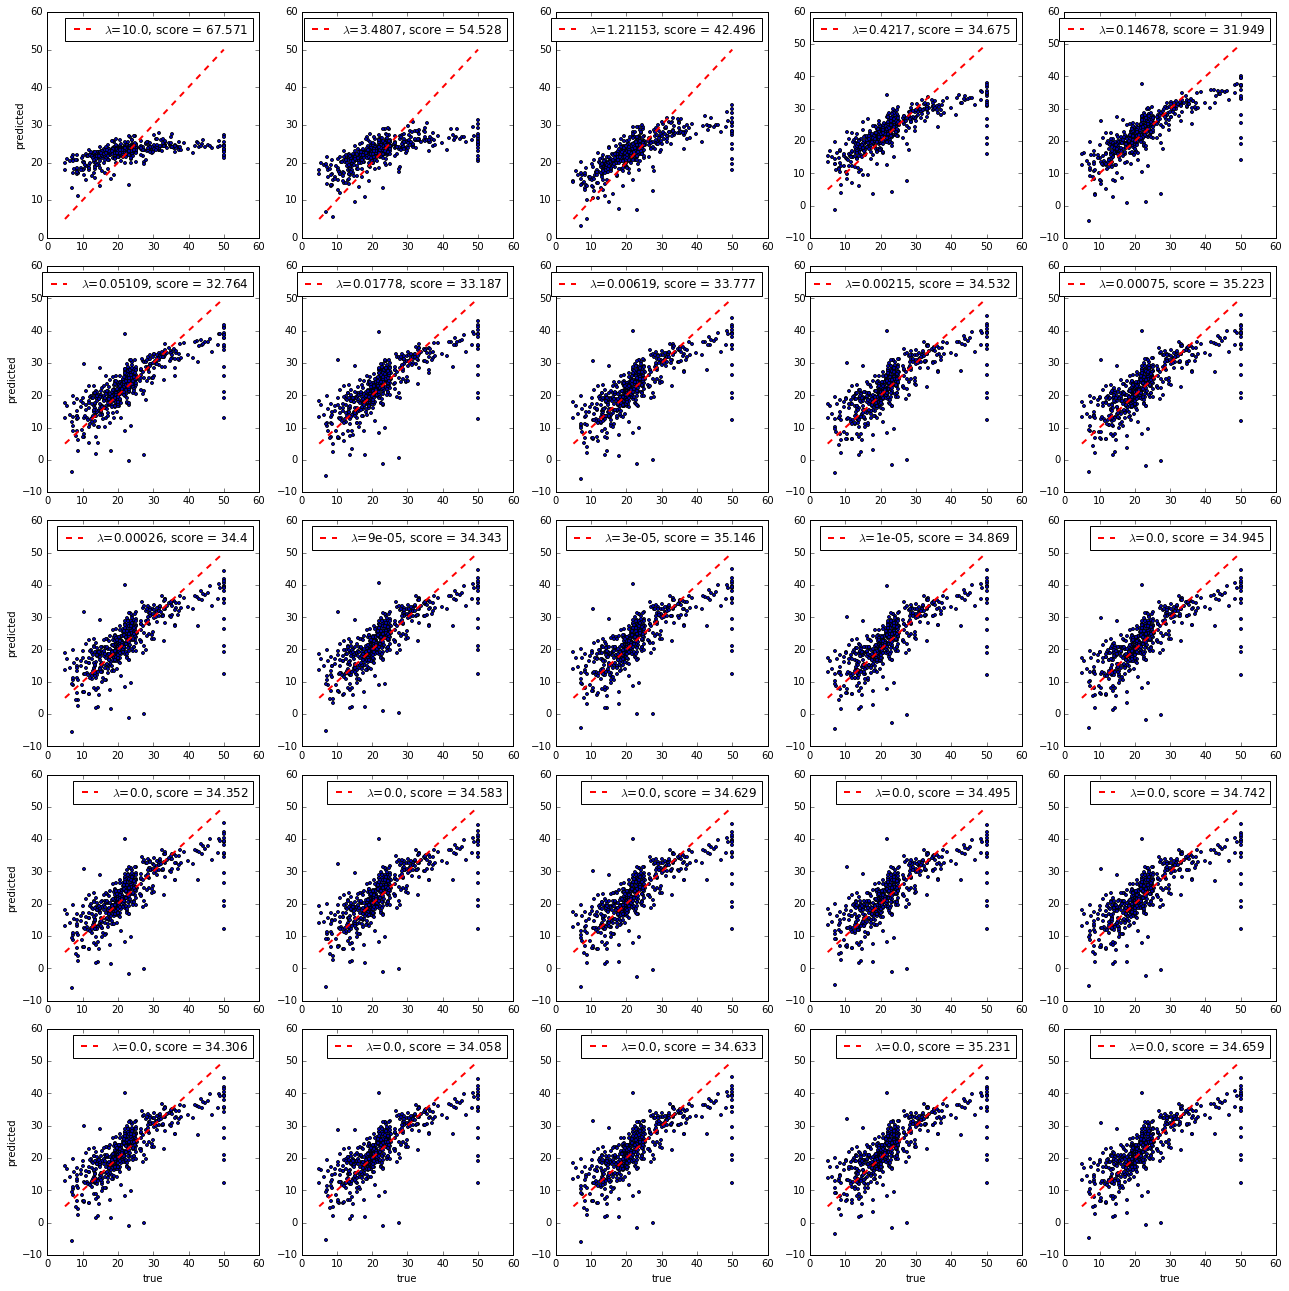

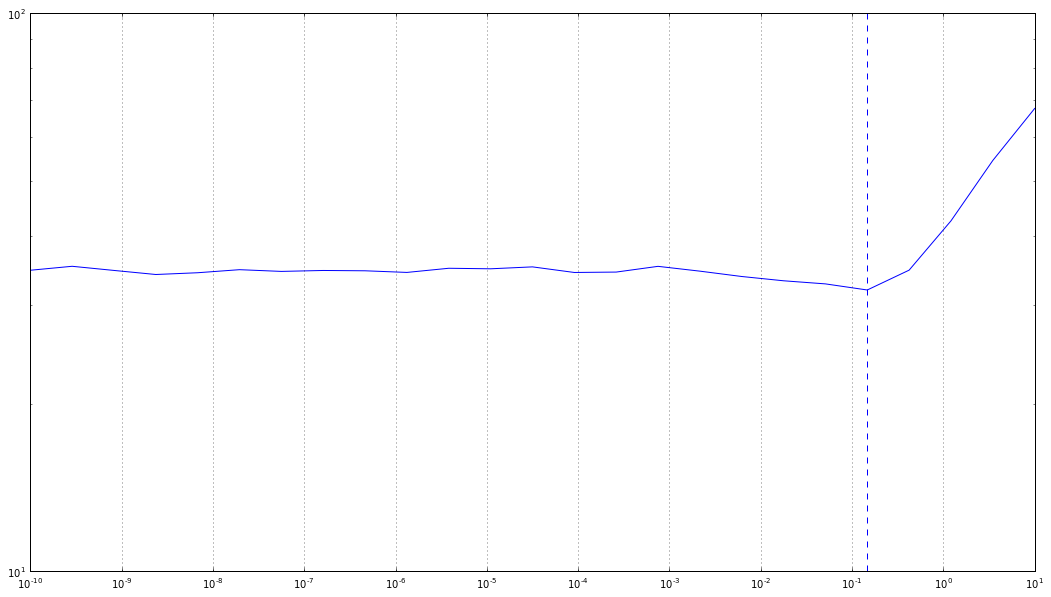

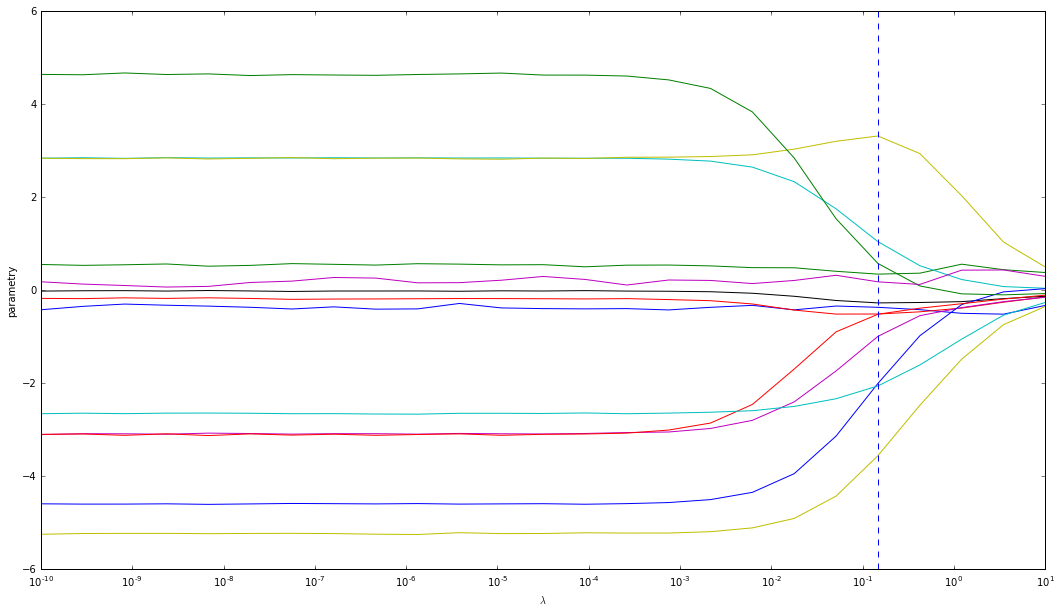

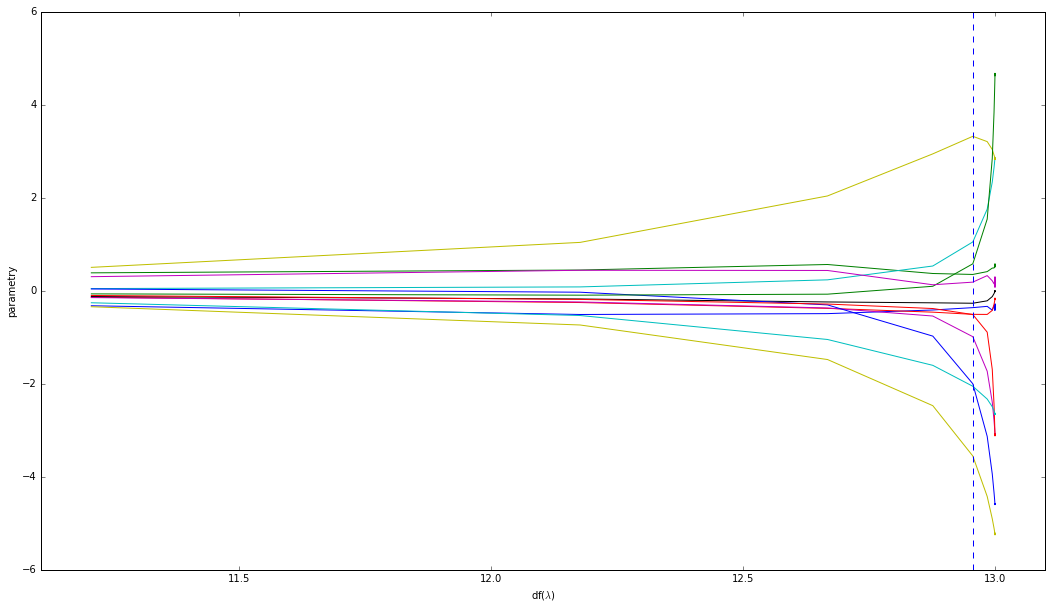

In [24]:
regression_regularization(data='boston', sss=5, penalty_mode='l2', n_iter=250)

In [25]:
def plot_regularization_isolines():
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    x = np.linspace(-1, 1, 1000)
    y = [np.sqrt(1. - v ** 2) for v in x]
    y1 = [-np.sqrt(1. - v ** 2) for v in x]
    ax[0].plot(x, y, c='c')
    ax[0].plot(x, y1, c='c')
    ax[0].set_xlim(-1.1, 1.1)
    ax[0].set_ylim(-1.1, 1.1)
    ax[0].grid()
    ax[0].set_title("Ridge regression")

    y = [(1. - abs(v)) for v in x]
    y1 = [-(1. - abs(v)) for v in x]
    ax[1].plot(x, y, c='m')
    ax[1].plot(x, y1, c='m')
    ax[1].set_xlim(-1.1, 1.1)
    ax[1].set_ylim(-1.1, 1.1)
    ax[1].grid()
    ax[1].set_title("Lasso")

    alpha = 0.2
    y = [(1. - abs(v)) for v in x]
    y1 = [-(1. - abs(v)) for v in x]
    ax[2].plot(x, y, c='k')
    ax[2].plot(x, y1, c='k')
    ax[2].set_xlim(-1.1, 1.1)
    ax[2].set_ylim(-1.1, 1.1)
    ax[2].grid()
    ax[2].set_title("Elastic net")

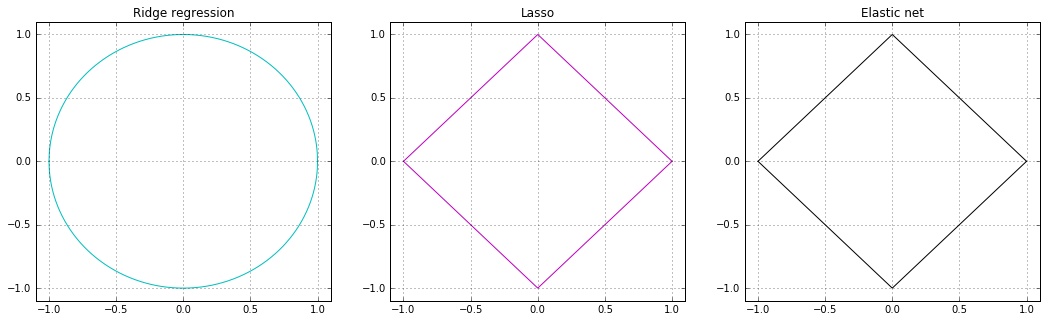

In [26]:
plot_regularization_isolines()

## Bardziej ogólne sformułowanie

* bardziej ogólne sformułowanie ma postać
  $$\boxed{\hat\theta = \underset{\theta}{\arg\min}\frac{1}{2}\sum_{n=1}^N\left(y_n-\theta^Tx_n\right)^2+\lambda\sum_{j=1}^M|\theta|^q\;}$$
  dla różnych $q$. 
  
* kontury dla różnych wartości $q$: izolinie pokazują obszary o tej samej wartości czynnika regularyzacji [z Hastie et al.] 
  <img src="regularization_contours.png" width="85%"/>
  
* wpływ ograniczeń dodawanych przez regularyzację na znalezione rozwiązanie [rysunek z Hastie et al.]
  <img src="regularization.png" width="90%"/>
  * niebieskie obszary odpowiadają rozwiązaniom dla których regularyzator jest mniejszy od jakiejś wartości $\rho$
  * dla $q=2$ (metoda __ridge regression__) będzie nim najbliższy do minimum funkcji kosztu (nieograniczonej) na izolinii regularyzatora
  * dla $q=2$ (metoda __lasso__) rozwiązanie będzie "ściągane" w kierunku osi współrzędnych danych
    * w efekcie rozwiązanie będzie __rzadsze__
    
  
* rozwiązanie ridge regression jest czułe na względne wielkości atrybutów
    * konieczne __normalizacja__ i __centrowanie__ atrybutów przed budową modelu
    * to wymaga niezależnego rozwiązania dla parametru bias $\theta_0$
    
* Hastie et al. definiują __efektywne stopnie swobody__ jako 
$$\begin{align}
df(\lambda)&=tr[X(X^TX+\lambda I)^{-1}X^T]\\
&=\sum_{j=1}^l\frac{d_j^2}{d_j^2+\lambda}
\end{align}$$
  * $d_j$ są składowymi głównymi macierzy $X$
  * $df(\lambda)\longrightarrow 0$ dla $\lambda\longrightarrow\infty$
  * $df(\lambda)=l$ dla $\lambda=0$
  * wynika z prostej analizy $X\hat\theta$ podstawiając $X=UDV$ z analizy składników głównych
  
  * ridge regression redukuje w __największym stopniu__ parametry odpowiadające atrybutom o __najmniejszej wariancji__

### Metoda Lasso

* sformułowana przez Hastie et al.
$$\boxed{\hat\theta=\underset{\theta}{\arg\min}\frac{1}{2}\sum_{n=1}^N\left(y_n-\theta_0-\sum_{j=1}^l\theta^T_jx_{nj}\right)^2+\lambda\sum_{j=1}^l|\theta_j|\;
}$$
  * brak rozwiązania w zamknietej postaci, jednak istnieją efektywne algorytmy
  * mała wartość ograniczenia na czynnik kary (albo duże $\lambda$) powoduje, efektywne __wyzerowanie__ parametrów dla niektórych składowych wejścia
    * lasso jest efektywnym algorytmem wyboru podzbioru cech wejściowych
    
    

### Elastic net
* Zou i Hastie w 2005 sformułowali __elastic net__ jako pewnego rodzaju połączenie ridge regression i lasso
$$\boxed{\hat\theta=\underset{\theta}{\arg\min}\frac{1}{2}\sum_{n=1}^N\left(y_n-\theta_0-\sum_{j=1}^l\theta^T_jx_{nj}\right)^2+\lambda\sum_{j=1}^l\left(\alpha\theta_j^2+(1-\alpha)|\theta_j|\right)\;
}$$
* kontury dla _elastic net_ [rysunek z Hastie et al.]
  <img src="elastic_net.png" width="45%"/>
  * kontury są bardzo podobne
    * kontur dla $\sum_j|\theta_j|^q$ dla $q=1.2$ ma __zaokrąglone brzegi
    * kontur dla $\sum_j\left(\alpha\theta_j^2+(1-\alpha)|\theta_j|\right)$ ma __ostre__ rogi
    * ostre rogi pozwalają algorytmowi (podobnie jak jak w przypadku lasso) ustawiać wartości parametrów __dokładnie__ w zerze


### Najlepszy podzbiór atrybutów

* zadanie: znaleźć zbiór atrybutów, który daje najniższą sumę kwadratów błędów
  * przegląd __wszystkich__ możliwych podzbiorów jest zbyt złożony już dla niewielkiej liczby atrybutów


* krok po kroku __w przód__
    * rozpoczyna od biasu, który jest średnią z wartości zmiennej zależnej $y$
    * w każdym kroku wyszukuje atrybut __najlepiej__ poprawiający dopasowanie i dodaje go do zbioru
    * zachłanny
   
   
* krok po kroku __wstecz__
    * rozpocznij od pełnego modelu
    * w każdym kolejnym kroku usuwaj atrybut o najmniejszym wpływie na roziązania
    * do uzycia __tylko__ jesli liczba przykładów jest większa od liczby parametrów
    
    
* zmienne często pojawiają się w grupach
  * to pozwala usunąć więcej niż jedną zmienną w jednym kroku
  * z drugiej strony atrybut $k$ często niesie wiedzę __tylko__ w połączeniu z atrybutem $j$, a usuwane (dodawane) są niezależnie

### Porównanie metod

* ridge regression skaluje parametry w sposób ciągły
* lasso zmniejsza (zwiększa) parametry o stały parametr $lambda$ powodując _obcięcie_ do zera w rogach i utworzenie rzadkiej reprezentacji
* metody redukcji modeli podejmują podejście __holistyczne__ redukując cały czas __wszystkie__ parametry
  * to pozwala na uwzględnienie współzależności atrybutów i ich jednoczesnego wpływu na rozwiązanie
